In [1]:
import pandas as pd

# Create a larger dataset for the student performance scenario
data = {
    'Hours of Study': [10, 15, 8, 20, 25, 12, 18, 30, 5, 16,
                       22, 14, 19, 11, 21, 9, 17, 13, 24, 26,
                       28, 6, 27, 7, 4, 15, 20, 18, 10, 30,
                       12, 14, 19, 16, 22, 23, 11, 8, 5, 13,
                       9, 21, 15, 17, 20, 24, 26, 10, 14, 22],

    'Attendance Percentage': [85, 90, 78, 95, 88, 80, 92, 70, 60, 95,
                             88, 82, 75, 90, 94, 81, 89, 76, 80, 92,
                             85, 65, 90, 75, 60, 82, 88, 90, 77, 93,
                             91, 89, 84, 86, 92, 80, 78, 85, 70, 94,
                             95, 85, 90, 80, 92, 87, 86, 75, 90, 80],

    'Extracurricular Activities': [2, 3, 1, 4, 5, 2, 3, 0, 1, 4,
                                   2, 1, 3, 2, 4, 1, 0, 2, 3, 4,
                                   5, 3, 1, 2, 4, 3, 0, 2, 1, 5,
                                   3, 2, 4, 1, 2, 5, 0, 3, 4, 2,
                                   1, 0, 2, 3, 5, 4, 3, 1, 2, 4],

    'Parent\'s Education Level': [2, 3, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2,
                                   2, 3, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2],

    'Final Grade': [75, 85, 60, 95, 80, 70, 90, 50, 40, 88,
                    77, 82, 66, 92, 91, 72, 65, 80, 89, 94,
                    68, 59, 85, 78, 55, 81, 88, 84, 75, 90,
                    73, 88, 67, 76, 79, 85, 80, 62, 60, 70,
                    78, 85, 91, 76, 87, 92, 90, 88, 72, 81]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('student_performance.csv', index=False)

print("Dataset created and saved as 'student_performance.csv'")


Dataset created and saved as 'student_performance.csv'


   Hours of Study  Attendance Percentage  Extracurricular Activities  \
0              10                     85                           2   
1              15                     90                           3   
2               8                     78                           1   
3              20                     95                           4   
4              25                     88                           5   

   Parent's Education Level  Final Grade  
0                         2           75  
1                         3           85  
2                         1           60  
3                         3           95  
4                         2           80  
Training Mean Squared Error: 80.4609638158474
Test Mean Squared Error: 104.03426898257362
Training R-squared: 0.49222970357009543
Test R-squared: -0.12725397098898705


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+03, tolerance: 6.338e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

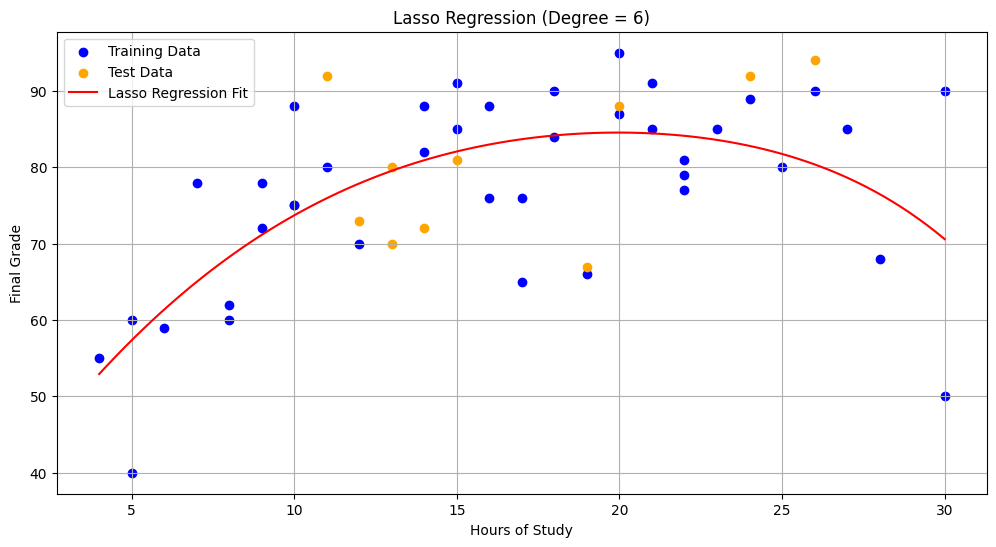


Actual vs Predicted:
   Actual Final Grades  Predicted Final Grades
0                   92               75.946880
1                   70               79.537344
2                   73               77.883242
3                   92               82.799781
4                   80               79.537344
5                   72               80.927509
6                   88               84.543146
7                   81               82.070966
8                   67               84.452882
9                   94               80.377422


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('student_performance.csv')

# Display the first few rows of the dataset
print(df.head())

# Use only one feature for clarity
X = df[['Hours of Study']]
y = df['Final Grade']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=6)  # Higher degree to illustrate fitting
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0)  # You can adjust the alpha parameter for regularization strength

# Train the model
lasso_model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = lasso_model.predict(X_train_poly)
y_test_pred = lasso_model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {mse_train}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Training R-squared: {r2_train}')
print(f'Test R-squared: {r2_test}')

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for training and test data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')

# Generate values for plotting the polynomial line
X_range = np.linspace(X['Hours of Study'].min(), X['Hours of Study'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = lasso_model.predict(X_range_poly)

# Plot the polynomial regression line
plt.plot(X_range, y_range_pred, color='red', label='Lasso Regression Fit')

# Customizing the plot
plt.title('Lasso Regression (Degree = 6)')
plt.xlabel('Hours of Study')
plt.ylabel('Final Grade')
plt.legend()
plt.grid()
plt.show()

# Print actual and predicted values in two columns
results = pd.DataFrame({'Actual Final Grades': y_test.values, 'Predicted Final Grades': y_test_pred})
print("\nActual vs Predicted:")
print(results)
